### Import lib and install

In [1]:
pip install openai


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [2]:
dataset_path = "annotated dataset//aggregated_dataset.csv"

### Pre-Process Daatset

In [5]:
df = pd.read_csv(dataset_path)
df

,_unit_id,_golden,_unit_state,_trusted_judgments,confidence,confidence:stddev,relation,relation:confidence,orig__golden,context,pair_id,relation_gold,relation_gold_reason,sentence_1,sentence_2,speaker_1,speaker_2,topic
0,3085729585,True,golden,65,4.45,0.702,neither,0.8807,True,"<strong>Kamala Harris:</strong> ""Please vote.""...",n160434b07p3539,Neither,"In these two sentences, the speaker is simply ...",And I have every confidence that the same Amer...,And I think that movement of Americans has onl...,Mike Pence,Mike Pence,Election
1,3085729586,True,golden,70,4.46,0.750,neither,0.9203,True,"<strong>Donald Trump:</strong> ""Look what happ...",n010145b07p4345,Neither,"Here, the speaker is reiterating an opinion, t...",This is ridiculous.,Absolutely ridiculous.,Joe Biden,Joe Biden,Racism
2,3085729587,True,golden,60,3.93,0.772,neither,1.0000,True,"<strong>Donald Trump:</strong> ""And you’ll get...",n000798b07p9495,Neither,The relation between these sentences is classi...,But let me just tell you-,In [crosstalk 00:16:04]?,Donald Trump,Joe Biden,Economy
3,3085729588,False,golden,6,4.33,0.471,attack,0.4744,True,"<strong>Kristen Welker:</strong> ""I have one f...",n030538b07p3536,attack,This is an attack relation. Tump uses the sent...,"By the way, I have a transition from the old i...","Oh, that’s a big statement.",Joe Biden,Donald Trump,Climate change
4,3085729589,True,golden,67,4.57,0.628,support,0.9631,True,"<strong>Susan Page:</strong> ""So, tell us spec...",n160224b07p1920,Support,This is a support relation. It helps to put it...,I couldn’t be more proud to serve as vice pres...,I’m pro-life.,Mike Pence,Mike Pence,Supreme Court
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,3102289860,True,golden,27,4.15,0.705,neither,0.9597,NaN,"<strong>Donald Trump:</strong> ""No, no.""\n<br>...",n120327b07p2733,neither,This is neither support nor attack. One of the...,And the word is-,And that’s what’s happening.,Donald Trump,Donald Trump,Racism
4100,3102290142,True,golden,28,4.04,0.823,neither,1.0000,NaN,"<strong>Joe Biden:</strong> ""By the way, my so...",n010330b07p3035,neither,This is neither support nor attack. They are r...,Can you get back 30 seconds?,"You in the home, you got less you’re in more t...",Joe Biden,Joe Biden,Why They Should Be Elected
4101,3102290221,True,golden,26,4.00,0.679,neither,0.9202,NaN,"<strong>Donald Trump:</strong> ""And why aren’t...",n010064b07p6570,neither,This is neither support nor attack. They are r...,And they’ve got you wrapped around their finge...,"Yes, there is.",Donald Trump,Joe Biden,Racism
4102,3102290404,True,golden,25,4.04,0.774,neither,0.9209,NaN,"<strong>Chris Wallace:</strong> ""This month, y...",n010101b07p0001,neither,This is neither support nor attack. One of the...,"And you know it, and so does everybody else.",And he would know it- [crosstalk 00:33:02],Donald Trump,Donald Trump,Racism


In [6]:
print(len(df["_unit_id"].unique()))

4104


In [7]:
df.value_counts("relation")

relation
neither    3600
support     384
attack      120
dtype: int64

In [8]:
df.value_counts("relation_gold")

relation_gold
neither             41
Neither             21
Support             18
support              9
Attack               8
attack               6
Support\nNeither     1
dtype: int64

In [9]:
# Change word to number
def apply_AAF_BAF(df):
  tweet_col = "relation"
  df_copy = df.copy()
  df_copy[tweet_col + '_AAF'] = df_copy[tweet_col].apply(lambda x: 1 if x == 'attack' else 0)
  df_copy[tweet_col + '_BAF'] = df_copy[tweet_col].apply(lambda x: 1 if x == 'attack' else (2 if x == 'support' else 0))
  return df_copy




*   **relation_AAF** 1 mean attack, 0 mean not attack
*   **relation_BAF** 1 mean attack, 2 mean not support, 3 mean neither




In [10]:
df = apply_AAF_BAF(df)

In [11]:
df.value_counts("relation_AAF")

relation_AAF
0    3984
1     120
dtype: int64

In [12]:
df.value_counts("relation_BAF")

relation_BAF
0    3600
2     384
1     120
dtype: int64

### GPT model

In [23]:
import openai

openai.api_key = " Insert your api key here "

In [24]:
# list avaliable model
model_list = openai.Model.list()
for i in model_list["data"]:
  print(i["id"])

text-davinci-001
text-search-curie-query-001
davinci
gpt-3.5-turbo-16k-0613
text-babbage-001
curie-instruct-beta
text-davinci-003
davinci-similarity
code-davinci-edit-001
text-similarity-curie-001
text-embedding-ada-002
ada-code-search-text
text-search-ada-query-001
babbage-search-query
ada-similarity
gpt-3.5-turbo
text-search-ada-doc-001
text-search-babbage-query-001
code-search-ada-code-001
curie-search-document
text-search-davinci-query-001
text-search-curie-doc-001
gpt-3.5-turbo-0301
babbage-search-document
babbage-code-search-text
whisper-1
gpt-3.5-turbo-16k
davinci-instruct-beta
davinci-search-query
text-similarity-babbage-001
text-davinci-002
code-search-babbage-text-001
babbage
text-search-davinci-doc-001
code-search-ada-text-001
ada-search-query
text-similarity-ada-001
ada-code-search-code
ada
text-davinci-edit-001
davinci-search-document
curie-search-query
babbage-similarity
ada-search-document
text-ada-001
text-similarity-davinci-001
curie
curie-similarity
gpt-3.5-turbo-0613

In [19]:
# Extract columns into list
list_relation = df["relation_BAF"].tolist()
list_id = df["_unit_id"].tolist()
list_s1 = df["sentence_1"].tolist()
list_s2 = df["sentence_2"].tolist()
print(len(list_relation))
print(len(list_id))
print(len(list_s1))
print(len(list_s2))


4104
4104
4104
4104


In [38]:
def classify_sentences(sentence1, sentence2):
    prompt = f"Classify the relationship is Sentence 1 attack, support, or neithier to Sentence 2 answer in one of these word: attack, support, or neithier:\n" \
             f"Sentence 1: {sentence1}\nSentence 2: {sentence2}\n"

    messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": f"Classify the relationship is Sentence 1 attack, support, or neither to Sentence 2 answer in only one of these words: attack, support, or neither :\nSentence 1: {sentence1}\nSentence 2: {sentence2} "}
    ]

    # Calling GPTAPI model gpt 3.5 turbo
    response_gpt_3_5_turbo = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=20
    )

    # Calling GPTAPI model gpt 3.5 turbo 16k version 0613
    response_gpt_3_5_0613 = openai.ChatCompletion.create(
        model="gpt-3.5-turbo-0613",
        messages=messages,
        max_tokens=20
    )
    response_text_davinci_003 = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=20
    )
    class_davinci = response_text_davinci_003['choices'][0]['text'].strip().lower().replace(".", "")
    class_35 = response_gpt_3_5_turbo['choices'][0]['message']['content'].strip().lower().replace(".", "")
    class_35_16 = response_gpt_3_5_0613['choices'][0]['message']['content'].strip().lower().replace(".", "")
    print(class_davinci, class_35, class_35_16)
    choices = ["neither", "attack", "support"]
    if class_davinci in choices and class_35 in choices and class_35_16 in choices:
      return choices.index(class_davinci), choices.index(class_35), choices.index(class_35_16)
    else:
      return classify_sentences(sentence1, sentence2)

In [40]:
print(classify_sentences(df['sentence_1'][0], df['sentence_2'][0]))


support support support
(2, 2, 2)


In [41]:
import time
def process(i, k, c, list_gpt_davinci, list_gpt_35, list_gpt_35_0613, list_id_done):
    # k stand for number of previous index before catch error, such as error 502 bad gate way.
    # i stand for number of index in current loop
    # c stand for the number of index since the start
    print("element",(k+i),"k", k, "i", i, "c", c)
    print(list_id[k+i])
    c_davinci, c_35, c_35_0613 = classify_sentences(list_s1[k+i], list_s2[k+i])
    list_gpt_davinci.append(c_davinci)
    list_gpt_35.append(c_35)
    list_gpt_35_0613.append(c_35_0613)
    list_id_done.append(list_id[k+i])
    c+=1
    return list_gpt_davinci, list_gpt_35, list_gpt_35_0613, list_id_done, c

def try_task_with_retry(list_gpt_davinci, list_gpt_35, list_gpt_35_0613, list_id_done):
    k, c = 0, 0
    i = 0
    while True:
        try:
            list_gpt_davinci, list_gpt_35, list_gpt_35_0613, list_id_done, c = process(i, k, c, list_gpt_davinci, list_gpt_35, list_gpt_35_0613, list_id_done)

            if len(list_id_done) >= len(list_id):
                return list_gpt_davinci, list_gpt_35, list_gpt_35_0613
            i+=1

        except Exception as e:
            # Catch any error that occurred during the task execution
            print("----------------")
            print(f"An error occurred: {e}")
            print("Retrying in 10 seconds...")
            print(len(list_gpt_davinci))
            print(len(list_gpt_35))
            print(len(list_gpt_35_0613))
            print("----------------")
            i = 0
            k = c
            time.sleep(10)

# Example usage:
list_gpt_davinci = []
list_gpt_35 = []
list_gpt_35_0613 = []
list_id_done=[]
list_gpt_davinci, list_gpt_35, list_gpt_35_0613 = try_task_with_retry(list_gpt_davinci, list_gpt_35, list_gpt_35_0613, list_id_done)

element 0 k 0 i 0 c 0
3085729585
support support support
element 1 k 0 i 1 c 1
3085729586
support support support
element 2 k 0 i 2 c 2
3085729587
neither neither neither
element 3 k 0 i 3 c 3
3085729588
neither neither neither
element 4 k 0 i 4 c 4
3085729589
support support support
element 5 k 0 i 5 c 5
3085729590
neither neither neither
element 6 k 0 i 6 c 6
3085729591
neither neither neither
element 7 k 0 i 7 c 7
3085729592
----------------
An error occurred: Bad gateway. {"error":{"code":502,"message":"Bad gateway.","param":null,"type":"cf_bad_gateway"}} 502 {'error': {'code': 502, 'message': 'Bad gateway.', 'param': None, 'type': 'cf_bad_gateway'}} {'Date': 'Thu, 03 Aug 2023 14:28:51 GMT', 'Content-Type': 'application/json', 'Content-Length': '84', 'Connection': 'keep-alive', 'X-Frame-Options': 'SAMEORIGIN', 'Referrer-Policy': 'same-origin', 'Cache-Control': 'private, max-age=0, no-store, no-cache, must-revalidate, post-check=0, pre-check=0', 'Expires': 'Thu, 01 Jan 1970 00:00:01

In [47]:
list_ori =  list(df["relation_BAF"])

In [49]:
print("========")
print("Original")
print("Neither:",list_ori.count(0))
print("Attack:",list_ori.count(1))
print("Support:",list_ori.count(2))
print("--------")
print("davinci")
print("Neither:",list_gpt_davinci.count(0))
print("Attack:",list_gpt_davinci.count(1))
print("Support:",list_gpt_davinci.count(2))
print("--------")
print("35")
print("Neither:",list_gpt_35.count(0))
print("Attack:",list_gpt_35.count(1))
print("Support:",list_gpt_35.count(2))
print("--------")
print("35.16")
print("Neither:",list_gpt_35_0613.count(0))
print("Attack:",list_gpt_35_0613.count(1))
print("Support:",list_gpt_35_0613.count(2))

Original
Neither: 3600
Attack: 120
Support: 384
--------
davinci
Neither: 2915
Attack: 381
Support: 808
--------
35
Neither: 3098
Attack: 485
Support: 521
--------
35.16
Neither: 3091
Attack: 488
Support: 525


In [57]:
print(len(list_gpt_35_0613))

4104


In [64]:
df['gpt_davinci'] = list_gpt_davinci
df['gpt_35'] = list_gpt_35
df['gpt_35_0613'] = list_gpt_35_0613
df

,_unit_id,_golden,_unit_state,_trusted_judgments,confidence,confidence:stddev,relation,relation:confidence,orig__golden,context,...,sentence_1,sentence_2,speaker_1,speaker_2,topic,relation_AAF,relation_BAF,gpt_davinci,gpt_35,gpt_35_0613
0,3085729585,True,golden,65,4.45,0.702,neither,0.8807,True,"<strong>Kamala Harris:</strong> ""Please vote.""...",...,And I have every confidence that the same Amer...,And I think that movement of Americans has onl...,Mike Pence,Mike Pence,Election,0,0,2,2,2
1,3085729586,True,golden,70,4.46,0.750,neither,0.9203,True,"<strong>Donald Trump:</strong> ""Look what happ...",...,This is ridiculous.,Absolutely ridiculous.,Joe Biden,Joe Biden,Racism,0,0,2,2,2
2,3085729587,True,golden,60,3.93,0.772,neither,1.0000,True,"<strong>Donald Trump:</strong> ""And you’ll get...",...,But let me just tell you-,In [crosstalk 00:16:04]?,Donald Trump,Joe Biden,Economy,0,0,0,0,0
3,3085729588,False,golden,6,4.33,0.471,attack,0.4744,True,"<strong>Kristen Welker:</strong> ""I have one f...",...,"By the way, I have a transition from the old i...","Oh, that’s a big statement.",Joe Biden,Donald Trump,Climate change,1,1,0,0,0
4,3085729589,True,golden,67,4.57,0.628,support,0.9631,True,"<strong>Susan Page:</strong> ""So, tell us spec...",...,I couldn’t be more proud to serve as vice pres...,I’m pro-life.,Mike Pence,Mike Pence,Supreme Court,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,3102289860,True,golden,27,4.15,0.705,neither,0.9597,NaN,"<strong>Donald Trump:</strong> ""No, no.""\n<br>...",...,And the word is-,And that’s what’s happening.,Donald Trump,Donald Trump,Racism,0,0,0,0,0
4100,3102290142,True,golden,28,4.04,0.823,neither,1.0000,NaN,"<strong>Joe Biden:</strong> ""By the way, my so...",...,Can you get back 30 seconds?,"You in the home, you got less you’re in more t...",Joe Biden,Joe Biden,Why They Should Be Elected,0,0,0,0,0
4101,3102290221,True,golden,26,4.00,0.679,neither,0.9202,NaN,"<strong>Donald Trump:</strong> ""And why aren’t...",...,And they’ve got you wrapped around their finge...,"Yes, there is.",Donald Trump,Joe Biden,Racism,0,0,0,0,0
4102,3102290404,True,golden,25,4.04,0.774,neither,0.9209,NaN,"<strong>Chris Wallace:</strong> ""This month, y...",...,"And you know it, and so does everybody else.",And he would know it- [crosstalk 00:33:02],Donald Trump,Donald Trump,Racism,0,0,0,0,0


In [65]:
df.to_csv('web-dash//mvp1data.csv', index=False)

### Evaluating section

In [66]:
mvp1_path = "Web-Dash//mvp1data.csv"

In [67]:
df_mvp1 = pd.read_csv(mvp1_path)
df_mvp1

,_unit_id,_golden,_unit_state,_trusted_judgments,confidence,confidence:stddev,relation,relation:confidence,orig__golden,context,...,sentence_1,sentence_2,speaker_1,speaker_2,topic,relation_AAF,relation_BAF,gpt_davinci,gpt_35,gpt_35_0613
0,3085729585,True,golden,65,4.45,0.702,neither,0.8807,True,"<strong>Kamala Harris:</strong> ""Please vote.""...",...,And I have every confidence that the same Amer...,And I think that movement of Americans has onl...,Mike Pence,Mike Pence,Election,0,0,2,2,2
1,3085729586,True,golden,70,4.46,0.750,neither,0.9203,True,"<strong>Donald Trump:</strong> ""Look what happ...",...,This is ridiculous.,Absolutely ridiculous.,Joe Biden,Joe Biden,Racism,0,0,2,2,2
2,3085729587,True,golden,60,3.93,0.772,neither,1.0000,True,"<strong>Donald Trump:</strong> ""And you’ll get...",...,But let me just tell you-,In [crosstalk 00:16:04]?,Donald Trump,Joe Biden,Economy,0,0,0,0,0
3,3085729588,False,golden,6,4.33,0.471,attack,0.4744,True,"<strong>Kristen Welker:</strong> ""I have one f...",...,"By the way, I have a transition from the old i...","Oh, that’s a big statement.",Joe Biden,Donald Trump,Climate change,1,1,0,0,0
4,3085729589,True,golden,67,4.57,0.628,support,0.9631,True,"<strong>Susan Page:</strong> ""So, tell us spec...",...,I couldn’t be more proud to serve as vice pres...,I’m pro-life.,Mike Pence,Mike Pence,Supreme Court,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,3102289860,True,golden,27,4.15,0.705,neither,0.9597,NaN,"<strong>Donald Trump:</strong> ""No, no.""\n<br>...",...,And the word is-,And that’s what’s happening.,Donald Trump,Donald Trump,Racism,0,0,0,0,0
4100,3102290142,True,golden,28,4.04,0.823,neither,1.0000,NaN,"<strong>Joe Biden:</strong> ""By the way, my so...",...,Can you get back 30 seconds?,"You in the home, you got less you’re in more t...",Joe Biden,Joe Biden,Why They Should Be Elected,0,0,0,0,0
4101,3102290221,True,golden,26,4.00,0.679,neither,0.9202,NaN,"<strong>Donald Trump:</strong> ""And why aren’t...",...,And they’ve got you wrapped around their finge...,"Yes, there is.",Donald Trump,Joe Biden,Racism,0,0,0,0,0
4102,3102290404,True,golden,25,4.04,0.774,neither,0.9209,NaN,"<strong>Chris Wallace:</strong> ""This month, y...",...,"And you know it, and so does everybody else.",And he would know it- [crosstalk 00:33:02],Donald Trump,Donald Trump,Racism,0,0,0,0,0


In [68]:
#Extract data from dataframe into list to easy to evaluate

y_true = df_mvp1["relation_BAF"].tolist()
y_davin = df_mvp1["gpt_davinci"].tolist()
y_35 = df_mvp1["gpt_35"].tolist()
y_35_0613 = df_mvp1["gpt_35_0613"].tolist()

original vs davin
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      3600
           1       0.13      0.40      0.19       120
           2       0.21      0.45      0.29       384

    accuracy                           0.71      4104
   macro avg       0.42      0.53      0.44      4104
weighted avg       0.83      0.71      0.76      4104



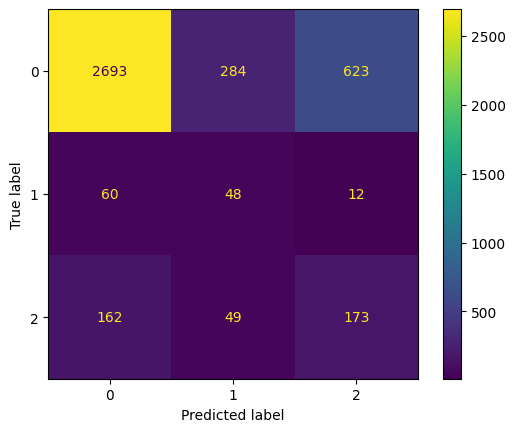

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
target_names = ['0', '1', '2']
print("original vs davin")
print(classification_report(y_true, y_davin, target_names=target_names))

cm = confusion_matrix(y_true, y_davin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

original vs GPT 3.5
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3600
           1       0.09      0.37      0.15       120
           2       0.25      0.34      0.29       384

    accuracy                           0.73      4104
   macro avg       0.42      0.50      0.43      4104
weighted avg       0.83      0.73      0.77      4104



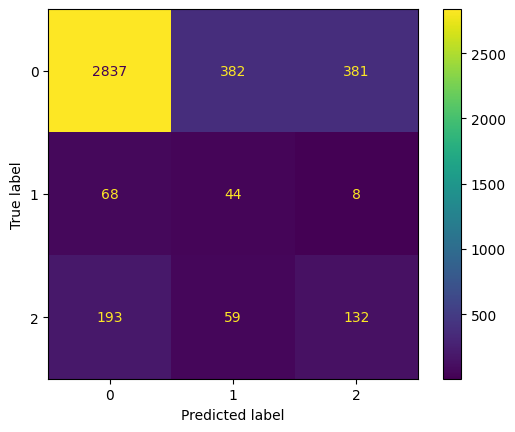

In [71]:
print("original vs GPT 3.5")
print(classification_report(y_true, y_35, target_names=target_names))

cm = confusion_matrix(y_true, y_35)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

original vs GPT 3.5 version 0613
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3600
           1       0.10      0.40      0.16       120
           2       0.22      0.31      0.26       384

    accuracy                           0.73      4104
   macro avg       0.41      0.50      0.42      4104
weighted avg       0.83      0.73      0.77      4104



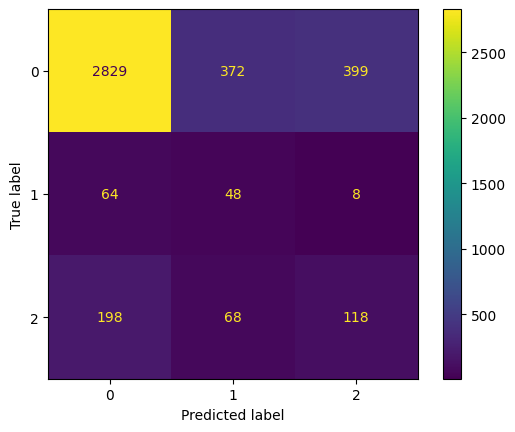

In [72]:
print("original vs GPT 3.5 version 0613")
print(classification_report(y_true, y_35_0613, target_names=target_names))

cm = confusion_matrix(y_true, y_35_0613)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [82]:
df_mvp1_copy = df_mvp1
list_gold = df_mvp1_copy['relation_gold']
df_mvp1_copy.value_counts('relation_gold')

relation_gold
neither             41
Neither             21
Support             18
support              9
Attack               8
attack               6
Support\nNeither     1
dtype: int64

In [85]:
df_mvp1_copy = df_mvp1_copy.dropna(subset=['relation_gold'])

In [109]:
y_true_gold = df_mvp1_copy["relation_gold"].tolist()
y_davin_gold = df_mvp1_copy["gpt_davinci"].tolist()
y_35_gold = df_mvp1_copy["gpt_35"].tolist()
y_35_0613_gold = df_mvp1_copy["gpt_35_0613"].tolist()

In [93]:
test =[1,2,3]
test1 = test[:1] + test[2:]
print(test1)

[1, 3]


In [111]:
count= 0
relation = ['neither', 'attack', 'support']
for i in range(len(y_true_gold)):
    print(y_true_gold[i].lower())
    count+=1
    print(count)
    if y_true_gold[i].lower() not in relation:
        y_true_gold = y_true_gold[:i] + y_true_gold[i+1:]
        y_davin_gold = y_davin_gold[:i] + y_davin_gold[i+1:]
        y_35_gold = y_35_gold[:i] + y_35_gold[i+1:]
        y_35_0613_gold = y_35_0613_gold[:i] + y_35_0613_gold[i+1:]

neither
1
neither
2
neither
3
attack
4
support
5
neither
6
support
7
attack
8
support
9
support
10
support
11
support
12
neither
13
neither
14
attack
15
support
16
neither
17
neither
18
neither
19
neither
20
support
21
neither
22
neither
23
support
24
support
25
support
26
neither
27
support
28
support
29
attack
30
attack
31
attack
32
neither
33
neither
34
support
35
neither
36
neither
37
support
38
neither
39
neither
40
support
41
neither
42
support
43
neither
44
support
45
neither
46
neither
47
attack
48
attack
49
attack
50
neither
51
neither
52
neither
53
neither
54
neither
55
neither
56
support
57
support
58
neither
59
attack
60
neither
61
neither
62
neither
63
neither
64
support
65
neither
66
attack
67
neither
68
support
69
neither
70
neither
71
neither
72
neither
73
neither
74
neither
75
support
76
attack
77
neither
78
neither
79
support
80
neither
81
neither
82
neither
83
neither
84
attack
85
attack
86
neither
87
support
88
neither
89
support
90
neither
91
neither
92
neither
93


In [112]:
for i in range(len(y_true_gold)):
    if y_true_gold[i].lower() == 'neither':
        y_true_gold[i] = 0
    elif y_true_gold[i].lower() == 'attack':
        y_true_gold[i] = 1
    elif y_true_gold[i].lower() == 'support':
        y_true_gold[i] = 2


In [113]:
print(y_true_gold)

[0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]


gold vs davin
              precision    recall  f1-score   support

           0       0.71      0.68      0.69        62
           1       0.22      0.29      0.25        14
           2       0.50      0.48      0.49        27

    accuracy                           0.57       103
   macro avg       0.48      0.48      0.48       103
weighted avg       0.59      0.57      0.58       103



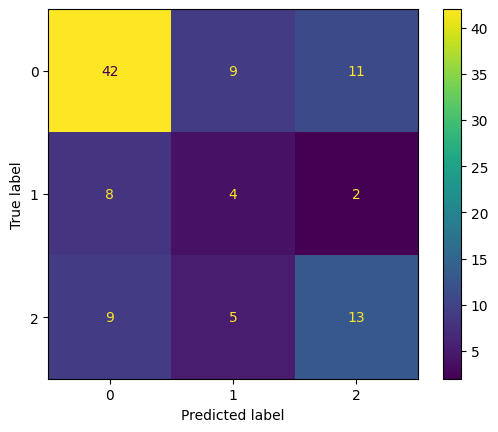

In [114]:
print("gold vs davin")
print(classification_report(y_true_gold, y_davin_gold, target_names=target_names))

cm = confusion_matrix(y_true_gold, y_davin_gold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

gold vs GPT 3.5
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        62
           1       0.26      0.36      0.30        14
           2       0.35      0.26      0.30        27

    accuracy                           0.51       103
   macro avg       0.42      0.43      0.42       103
weighted avg       0.51      0.51      0.51       103



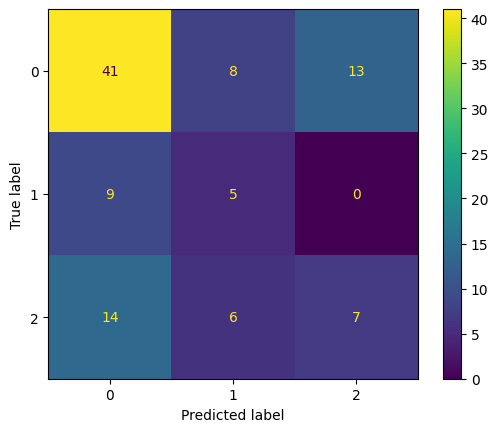

In [115]:
print("gold vs GPT 3.5")
print(classification_report(y_true_gold, y_35_gold, target_names=target_names))

cm = confusion_matrix(y_true_gold, y_35_gold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

gold vs GPT 3.5 version 0613
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        62
           1       0.29      0.43      0.34        14
           2       0.30      0.22      0.26        27

    accuracy                           0.53       103
   macro avg       0.43      0.45      0.43       103
weighted avg       0.53      0.53      0.53       103



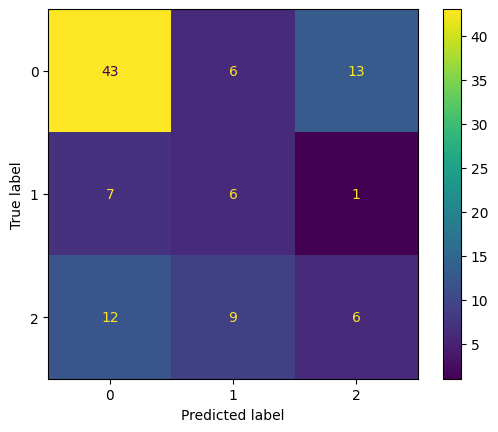

In [116]:
print("gold vs GPT 3.5 version 0613")
print(classification_report(y_true_gold, y_35_0613_gold, target_names=target_names))

cm = confusion_matrix(y_true_gold, y_35_0613_gold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()